In [1]:
import numpy as np 

def euler(f, a, b, n, ya):
    """
    Calculate the solution of the initial-value problem from Euler method
    Parameters:
        f: Function f(x)
        a: Initial point
        b: End point
        n: Number of intervals
        ya: Initial value
    Returns:
        vx: Array containing x values
        vy: Array containing y values (solution of IVP)
    """

    vx = np.zeros(n)
    vy = np.zeros((n,2))

    h = (b - a) / n
    x = a
    y = ya

    vx[0] = x
    vy[0] = y

    fxy = f(y)
    
    for i in range(0, n):
        
        x = a + (i + 1) * h
        y = np.add(y, h * fxy, out=y, casting="unsafe").reshape((1,2))

        fxy = f(y)
        
        vx[i] = x
        vy[i] = y
        

    return [vx, vy]



def rk4_system(f, a, b, n, ya):
    """
    Calculate the solution of systems of differential equations from
    Runge-Kutta (Order Four) method.
    Parameters:
        f: Array of functions f(x)
        a: Initial point
        b: End point
        n: Number of intervals
        ya: Array of initial values
    Returns:
        vx: Array containing x values
        vy: Array containing y values (solution of IVP)
    """

    m = len(f)

    k = [np.zeros(m), np.zeros(m), np.zeros(m), np.zeros(m)]

    vx = np.zeros(n + 1)
    vy = np.zeros((m, n + 1))

    h = (b - a) / n

    x = a
    y = ya

    vx[0] = x
    vy[:, 0] = y

    for i in range(0, n):

        for j in range(0, m):
            k[0][j] = h * f[j](x, y)

        for j in range(0, m):
            k[1][j] = h * f[j](x + h / 2, y + k[0] / 2)

        for j in range(0, m):
            k[2][j] = h * f[j](x + h / 2, y + k[1] / 2)

        for j in range(0, m):
            k[3][j] = h * f[j](x + h, y + k[2])

        x = a + i * h
        y = y + (k[0] + 2 * k[1] + 2 * k[2] + k[3]) / 6

        vx[i + 1] = x
        vy[:, i + 1] = y

    return [vx, vy]

# euler method : 

In [2]:
import math as math

In [3]:
def f(X):
    g, m, rho, d, Cd = 9.81, 0.4, 1.3, 0.22, 0.52
    
    return np.array([X[0][1], - (g + (0.5*rho*Cd*np.pi*math.pow(d,2)/m)*X[0][0]* abs(X[0][0]))]).reshape(1,2)

t, X = euler(f, 0, 4, 32, np.array([0, 40]).reshape(1,2))

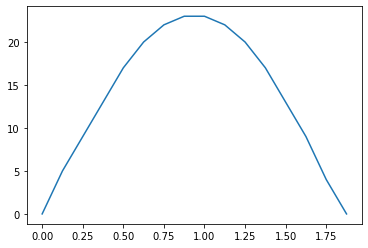

In [4]:
import matplotlib.pyplot as plt 

t = list(t[:15])
x = list(X[:15, 0])

t.insert(0, 0)
x.insert(0, 0)

t = np.array(t)
x = np.array(x)

plt.plot(t, x)

# RK4 : 

In [5]:
F = [lambda t, X : X[0][1], lambda t, X : - (9.81 + (((0.5 * 1.3  * np.pi * (0.22**2) * 0.52)/0.4)*X[0][0]*np.abs(X[0][0])))]

     
trk4, X_rk4 = rk4_system(F, 0, 4, 400, np.array([0, 40]).reshape(1,2))

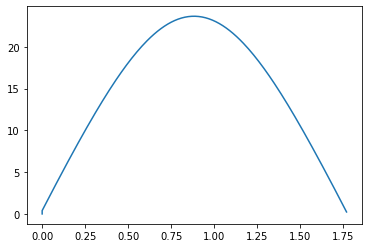

In [6]:
import matplotlib.pyplot as plt 

plt.plot(trk4[:44*4 + 3], X_rk4[0, :44*4 + 3])

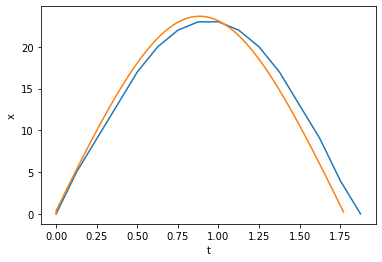

In [7]:
import matplotlib.pyplot as plt 

plt.xlabel('t')
plt.ylabel('x')

plt.plot(t, x, label='x vs t euler')
plt.plot(trk4[:44*4 + 3], X_rk4[0, :44*4 + 3], label = 'x vs t rk4')

In [8]:
v = list(X[:15, 1])

v.insert(0, 40)

v = np.array(v)

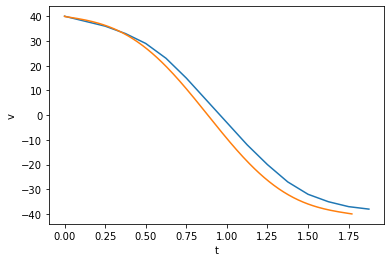

In [9]:
plt.xlabel('t')
plt.ylabel('v')

plt.plot(t, v, label='v vs t euler')
plt.plot(trk4[:44*4 + 3], X_rk4[1, :44*4 + 3], label = 'v vs t rk4')